### Notes:
#### - Ganti nomor punggung pemain dengan nama pemain di kolom "Player" sesuai data pertandingan Indonesia vs Timor Leste.
#### - Lakukan penyesuaian nama tim menjadi satu variabel di kolom "Team "agar memudahkan untuk klasfikasi nama di python (tim home beri nama Indonesia dan tim away beri nama Timor Leste).
#### - Lakukan penyesuaian nama momentum di lapangan pada kolom "Event" menjadi 4 momentum saja (Miss, Blocked, Saved, Goal).
#### - Konversi nilai xG menjadi angka desimal 2 angka di belakang koma.
#### - Sesuaikan nilai kordinat x dan y yang semua berbentuk desimal menjadi bilangan bulat.

### Team:
- IDN = Indonesia
- TLS = Timor Leste


### Skuad:
#### Indonesia
(XI): Cahya Supriadi (1); Ferrari (4), Kakang Rudianto (5), Robi Darwis (14), Frengky Deaner (17), Marselino Ferdinan (7), Arkhan Fikri (8), Dimas Juliono (13), Ginanjar Wahyu (20), Hokky Caraka (9), Rahmat Beri Santoso (21).

Cadangan: Erlangga Saputra (22), Aditya Arya (23); Ahmad Rusadi (2), Barnabas Sobor (3), Dia Syayid Alhawari (16), Zanadin Faris (6), Alfriyanto Nico (18), Achmad Syarif (12), Ronaldo Junior (10), Arsa Ramadan (11), Rabbani Tasnim (19).

#### Timor Leste
(XI): Filonito Nogueira (12); Juvito Moniz (13), Sandro Rivaldo (14), Joao Bosco Halle (16), Cristevao Fernandes (23), Fretelian Dos Santos (10), Luis Figo Ribeiro (7), Anizo Correia (9), Zenivio Conceicao Mota (11), William Quintas Vong (15), Mario Donasio (17).

Cadangan: Junildo Pereira (1), Juvencio Da Silva (20); Danilio Alves (2), RIcardo Bianco (3), Rivaldo Martins (5), Olagar Xzvier (18), Jonatas Pereira (6), Norberto Da Costa (22), Ejivanio Ferreira Da Costa (8), Alexandro Lemos (19).

### Event:
- Miss = Melenceng
- Saved = Diamankan
- Blocked = Diblok
- Goal = Gol

### Konversi xG:
7% = 0.07

### Kordinat x,y:
88.3 = 88
16.4 = 16

In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.utils import FontManager
from matplotlib import font_manager
import matplotlib as mpl
from mplsoccer.pitch import Pitch

In [2]:
# panggil dataset
df = pd.read_csv("dataset/pacmann_study_case.csv")
df

,Team,xG,Player,Event,x,y,Minutes
0,IDN,10%,17,Diblok,88.1,31.4,1.0
1,IDN,7%,20,Diamankan,93.3,70.2,2.0
2,IDN,15%,20,Diblok,87.2,54.3,2.0
3,IDN,1%,7,Melenceng,73.4,26.3,3.0
4,IDN,12%,4,Melenceng,93.2,41.3,5.0
5,IDN,5%,9,Melenceng,95.4,65.3,6.0
6,IDN,2%,17,Diblok,86.4,70.3,7.0
7,IDN,9%,20,Melenceng,84.2,46.3,7.1
8,IDN,5%,5,Melenceng,90.3,68.1,9.1
9,IDN,12%,9,Gol,86.4,54.3,11.0


In [3]:
# cek tipe data
df.dtypes

Team        object
xG          object
Player       int64
Event       object
x          float64
y          float64
Minutes    float64
dtype: object

In [4]:
# sesuaikan tipe datanya
# menyesuaikan nilai kordinat x dan y
df[['x','y']] = df[['x','y']].astype('int')

# konversi xG:
df['xG']=df['xG'].apply(lambda x: x.replace('%', '')).astype('float') / 100
df

,Team,xG,Player,Event,x,y,Minutes
0,IDN,0.10,17,Diblok,88,31,1.0
1,IDN,0.07,20,Diamankan,93,70,2.0
2,IDN,0.15,20,Diblok,87,54,2.0
3,IDN,0.01,7,Melenceng,73,26,3.0
4,IDN,0.12,4,Melenceng,93,41,5.0
5,IDN,0.05,9,Melenceng,95,65,6.0
6,IDN,0.02,17,Diblok,86,70,7.0
7,IDN,0.09,20,Melenceng,84,46,7.1
8,IDN,0.05,5,Melenceng,90,68,9.1
9,IDN,0.12,9,Gol,86,54,11.0


In [5]:
# cek tipe data setelah diubah
df.dtypes

Team        object
xG         float64
Player       int64
Event       object
x            int32
y            int32
Minutes    float64
dtype: object

In [6]:
# menyesuaian nama di kolom Event
new_df = df.replace({'Event':{'Melenceng': 'Miss', 'Diamankan': 'Saved', 'Diblok':'Blocked', 'Gol':'Goal'}})
new_df

,Team,xG,Player,Event,x,y,Minutes
0,IDN,0.10,17,Blocked,88,31,1.0
1,IDN,0.07,20,Saved,93,70,2.0
2,IDN,0.15,20,Blocked,87,54,2.0
3,IDN,0.01,7,Miss,73,26,3.0
4,IDN,0.12,4,Miss,93,41,5.0
5,IDN,0.05,9,Miss,95,65,6.0
6,IDN,0.02,17,Blocked,86,70,7.0
7,IDN,0.09,20,Miss,84,46,7.1
8,IDN,0.05,5,Miss,90,68,9.1
9,IDN,0.12,9,Goal,86,54,11.0


In [7]:
# slicing data IDN di kolom Team
idn1 = new_df[new_df['Team'] == 'IDN']
idn1

,Team,xG,Player,Event,x,y,Minutes
0,IDN,0.10,17,Blocked,88,31,1.0
1,IDN,0.07,20,Saved,93,70,2.0
2,IDN,0.15,20,Blocked,87,54,2.0
3,IDN,0.01,7,Miss,73,26,3.0
4,IDN,0.12,4,Miss,93,41,5.0
5,IDN,0.05,9,Miss,95,65,6.0
6,IDN,0.02,17,Blocked,86,70,7.0
7,IDN,0.09,20,Miss,84,46,7.1
8,IDN,0.05,5,Miss,90,68,9.1
9,IDN,0.12,9,Goal,86,54,11.0


In [8]:
# penyesuaian nama IDN di kolom Team
indo = idn1.replace('IDN','Indonesia')
indo

,Team,xG,Player,Event,x,y,Minutes
0,Indonesia,0.10,17,Blocked,88,31,1.0
1,Indonesia,0.07,20,Saved,93,70,2.0
2,Indonesia,0.15,20,Blocked,87,54,2.0
3,Indonesia,0.01,7,Miss,73,26,3.0
4,Indonesia,0.12,4,Miss,93,41,5.0
5,Indonesia,0.05,9,Miss,95,65,6.0
6,Indonesia,0.02,17,Blocked,86,70,7.0
7,Indonesia,0.09,20,Miss,84,46,7.1
8,Indonesia,0.05,5,Miss,90,68,9.1
9,Indonesia,0.12,9,Goal,86,54,11.0


In [9]:
# mengganti nomor punggung pemain dengan nama pemain di kolom Player
home_team = indo.replace({'Player' : {4:'Ferrari',5:'Kakang Rudianto',7:'Marselino Ferdinan',8:'Arkhan Fikri',9:'Hokky Caraka',10:'Ronaldo Junior',17:'Frengky Deaner',19:'Rabbani Tasnim',20:'Ginanjar Wahyu'}})
home_team

,Team,xG,Player,Event,x,y,Minutes
0,Indonesia,0.10,Frengky Deaner,Blocked,88,31,1.0
1,Indonesia,0.07,Ginanjar Wahyu,Saved,93,70,2.0
2,Indonesia,0.15,Ginanjar Wahyu,Blocked,87,54,2.0
3,Indonesia,0.01,Marselino Ferdinan,Miss,73,26,3.0
4,Indonesia,0.12,Ferrari,Miss,93,41,5.0
5,Indonesia,0.05,Hokky Caraka,Miss,95,65,6.0
6,Indonesia,0.02,Frengky Deaner,Blocked,86,70,7.0
7,Indonesia,0.09,Ginanjar Wahyu,Miss,84,46,7.1
8,Indonesia,0.05,Kakang Rudianto,Miss,90,68,9.1
9,Indonesia,0.12,Hokky Caraka,Goal,86,54,11.0


In [10]:
# slicing data TLS di kolom Team
tleste = new_df[new_df['Team'] == 'TLS']
tleste

,Team,xG,Player,Event,x,y,Minutes
11,TLS,0.12,18,Miss,7,58,19.5
12,TLS,0.04,7,Blocked,10,30,23.2
13,TLS,0.01,11,Saved,26,19,23.3
14,TLS,0.17,7,Saved,10,31,24.0
19,TLS,0.23,11,Saved,8,45,33.5
22,TLS,0.03,23,Saved,27,46,36.1


In [11]:
# penyesuaian nama TLS di kolom Team
tleste2 = tleste.replace('TLS','Timor Leste')
tleste2

,Team,xG,Player,Event,x,y,Minutes
11,Timor Leste,0.12,18,Miss,7,58,19.5
12,Timor Leste,0.04,7,Blocked,10,30,23.2
13,Timor Leste,0.01,11,Saved,26,19,23.3
14,Timor Leste,0.17,7,Saved,10,31,24.0
19,Timor Leste,0.23,11,Saved,8,45,33.5
22,Timor Leste,0.03,23,Saved,27,46,36.1


In [12]:
# mengganti nomor punggung pemain dengan nama pemain di kolom Player
away_team = tleste2.replace({'Player' : {7:'Luis Figo Ribeiro', 11:'Zenivio Conceicao Mota',18:'Olagar Xzvier',23:'Cristevao Fernandes'}})
away_team

,Team,xG,Player,Event,x,y,Minutes
11,Timor Leste,0.12,Olagar Xzvier,Miss,7,58,19.5
12,Timor Leste,0.04,Luis Figo Ribeiro,Blocked,10,30,23.2
13,Timor Leste,0.01,Zenivio Conceicao Mota,Saved,26,19,23.3
14,Timor Leste,0.17,Luis Figo Ribeiro,Saved,10,31,24.0
19,Timor Leste,0.23,Zenivio Conceicao Mota,Saved,8,45,33.5
22,Timor Leste,0.03,Cristevao Fernandes,Saved,27,46,36.1


In [13]:
# seleksi Event berdasarkan Team home
xG_home_all_event = np.round(np.sum(home_team['xG']),2)
xG_home_blocked = np.round(np.sum(home_team[home_team['Event'] == 'Blocked']['xG']),2)
xG_home_miss = np.round(np.sum(home_team[home_team['Event'] == 'Miss']['xG']),2)
xG_home_saved = np.round(np.sum(home_team[home_team['Event'] == 'Saved']['xG']),2)
xG_home_goal = np.round(np.sum(home_team[home_team['Event'] == 'Goal']['xG']),2)

In [14]:
xG_home_all_event, xG_home_blocked, xG_home_miss, xG_home_saved, xG_home_goal

(4.39, 0.54, 1.54, 1.22, 1.09)

In [15]:
# seleksi Event berdasarkan Team away
xG_away_all_event = np.round(np.sum(away_team['xG']),2)
xG_away_blocked = np.round(np.sum(away_team[away_team['Event'] == 'Blocked']['xG']),2)
xG_away_miss = np.round(np.sum(away_team[away_team['Event'] == 'Miss']['xG']),2)
xG_away_saved = np.round(np.sum(away_team[away_team['Event'] == 'Saved']['xG']),2)
xG_away_goal = np.round(np.sum(away_team[away_team['Event'] == 'Goal']['xG']),2)

In [16]:
xG_away_all_event, xG_away_blocked, xG_away_miss, xG_away_saved, xG_away_goal

(0.6, 0.04, 0.12, 0.44, 0.0)

#### Seleksi hasil outcome tendangan berdasarkan Event.

In [17]:
# seleksi Tendangan yang menghasilkan Goal team home
df_home_goal = home_team[(home_team["Event"] == "Goal")]
df_home_goal

,Team,xG,Player,Event,x,y,Minutes
9,Indonesia,0.12,Hokky Caraka,Goal,86,54,11.0
17,Indonesia,0.29,Hokky Caraka,Goal,96,57,28.5
25,Indonesia,0.34,Hokky Caraka,Goal,95,56,48.3
33,Indonesia,0.34,Rabbani Tasnim,Goal,97,57,88.5


In [18]:
# seleksi Tendangan yang menghasilkan Goal team away
df_away_goal = away_team[(away_team["Event"] == "Goal")]
df_away_goal

,Team,xG,Player,Event,x,y,Minutes


In [19]:
# seleksi Tendangan yang diselamatkan oleh Kiper team home
df_home_saved = home_team[(home_team["Event"] == "Saved")]
df_home_saved

,Team,xG,Player,Event,x,y,Minutes
1,Indonesia,0.07,Ginanjar Wahyu,Saved,93,70,2.0
18,Indonesia,0.05,Ginanjar Wahyu,Saved,90,60,32.0
27,Indonesia,0.63,Ginanjar Wahyu,Saved,97,55,58.5
31,Indonesia,0.21,Hokky Caraka,Saved,91,54,69.4
32,Indonesia,0.26,Ronaldo Junior,Saved,91,53,78.0


In [20]:
# seleksi Tendangan yang diselamatkan oleh Kiper team away
df_away_saved = away_team[(away_team["Event"] == "Saved")]
df_away_saved

,Team,xG,Player,Event,x,y,Minutes
13,Timor Leste,0.01,Zenivio Conceicao Mota,Saved,26,19,23.3
14,Timor Leste,0.17,Luis Figo Ribeiro,Saved,10,31,24.0
19,Timor Leste,0.23,Zenivio Conceicao Mota,Saved,8,45,33.5
22,Timor Leste,0.03,Cristevao Fernandes,Saved,27,46,36.1


In [21]:
# seleksi Tendagan yang diBlocked team home
df_home_block = home_team[(home_team["Event"] == "Blocked")] 
df_home_block

,Team,xG,Player,Event,x,y,Minutes
0,Indonesia,0.10,Frengky Deaner,Blocked,88,31,1.0
2,Indonesia,0.15,Ginanjar Wahyu,Blocked,87,54,2.0
6,Indonesia,0.02,Frengky Deaner,Blocked,86,70,7.0
15,Indonesia,0.01,Marselino Ferdinan,Blocked,81,16,26.2
16,Indonesia,0.01,Arkhan Fikri,Blocked,82,28,28.1
20,Indonesia,0.06,Frengky Deaner,Blocked,88,33,35.0
26,Indonesia,0.05,Frengky Deaner,Blocked,88,66,51.5
28,Indonesia,0.13,Marselino Ferdinan,Blocked,94,30,60.3
29,Indonesia,0.01,Marselino Ferdinan,Blocked,82,25,60.5


In [22]:
# seleksi Tendagan yang diBlocked team away
df_away_block = away_team[(away_team["Event"] == "Blocked")]
df_away_block

,Team,xG,Player,Event,x,y,Minutes
12,Timor Leste,0.04,Luis Figo Ribeiro,Blocked,10,30,23.2


In [23]:
# seleksi Tendangan yang Melenceng team home
df_home_miss = home_team[(home_team["Event"] == "Miss")]
df_home_miss

,Team,xG,Player,Event,x,y,Minutes
3,Indonesia,0.01,Marselino Ferdinan,Miss,73,26,3.0
4,Indonesia,0.12,Ferrari,Miss,93,41,5.0
5,Indonesia,0.05,Hokky Caraka,Miss,95,65,6.0
7,Indonesia,0.09,Ginanjar Wahyu,Miss,84,46,7.1
8,Indonesia,0.05,Kakang Rudianto,Miss,90,68,9.1
10,Indonesia,0.17,Kakang Rudianto,Miss,93,44,13.3
21,Indonesia,0.50,Kakang Rudianto,Miss,97,56,35.4
23,Indonesia,0.13,Marselino Ferdinan,Miss,86,52,40.4
24,Indonesia,0.08,Ginanjar Wahyu,Miss,91,38,41.5
30,Indonesia,0.34,Ronaldo Junior,Miss,97,36,63.5


In [24]:
# seleksi Tendangan yang Melenceng team away
df_away_miss = away_team[(away_team["Event"] == "Miss")]
df_away_miss

,Team,xG,Player,Event,x,y,Minutes
11,Timor Leste,0.12,Olagar Xzvier,Miss,7,58,19.5


### Persiapan Visualisasi

In [25]:
home_color = '#000000'
away_color = '#036933'

#Set Warna Color Map
cmap_home = create_transparent_cmap(color= home_color,n_segments=100,alpha_start=0.2,alpha_end=0.8)
cmap_away = create_transparent_cmap(color= away_color,n_segments=100,alpha_start=0.2,alpha_end=0.8)

#List Posisi Goal 
x = df_home_goal[df_home_goal['Event']=='Goal']['x'].tolist()
x1 = df_away_goal[df_away_goal['Event']=='Goal']['x'].tolist()
y = df_home_goal[df_home_goal['Event']=='Goal']['y'].tolist()
y1 = df_away_goal[df_away_goal['Event']=='Goal']['y'].tolist()

# Annotation text nama pencetak gol
text_home = df_home_goal[df_home_goal['Event']=='Goal']['Player'].tolist()
text_away = df_away_goal[df_away_goal['Event']=='Goal']['Player'].tolist()

# Func Count untuk masing-masih tipe shoot
# Home
cnt_goal_home = len(df_home_goal)
cnt_saved_home = len(df_home_saved)
cnt_blocked_home = len(df_home_block)
cnt_missed_home = len(df_home_miss)

# Away
cnt_goal_away = len(df_away_goal)
cnt_saved_away = len(df_away_saved)
cnt_blocked_away = len(df_away_block)
cnt_missed_away = len(df_away_miss)

### Visualisasi

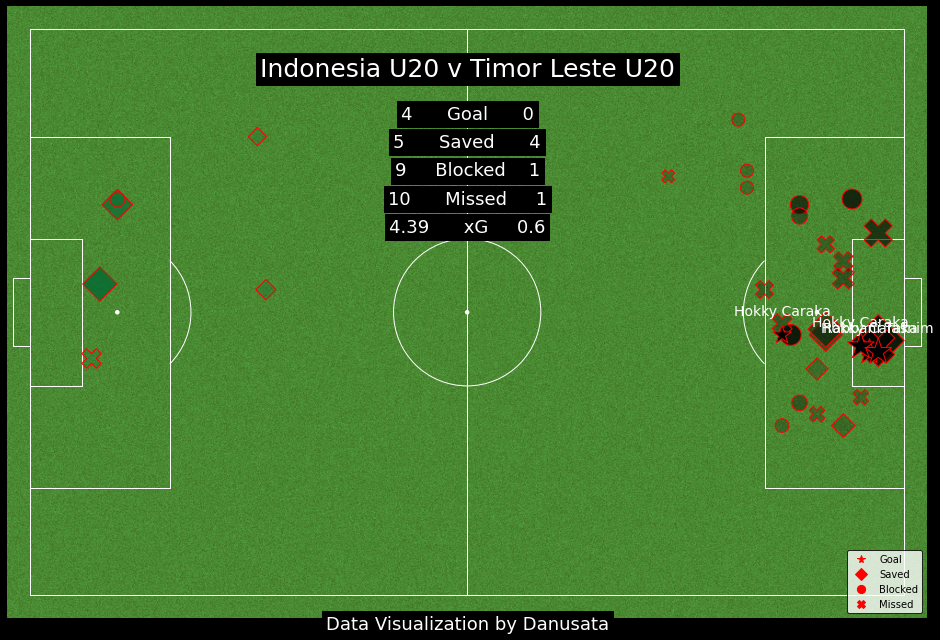

In [27]:
pitch = Pitch(pitch_type = 'wyscout', pitch_color='grass', line_color='white', linewidth=1, goal_type = 'box')
fig,ax = pitch.draw(figsize = (16,9))
fig.set_facecolor('#000000')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Saved Shot berdasarkan nilai xG
sc1 = plt.scatter(df_home_saved['x'],df_home_saved['y'], 
            s = ((df_home_saved['xG'] * 1900) + 150),
            cmap = cmap_home,
            c = df_home_saved['xG'],
            edgecolor = 'red',
            marker = 'D')
sc2 = plt.scatter(df_away_saved['x'],df_away_saved['y'], 
            s = ((df_away_saved['xG'] * 1900) + 150),
            cmap = cmap_away,
            c = df_away_saved['xG'],
            edgecolor = 'red',
            marker = 'D')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Blocked Shot berdasarkan nilai xG
sc3 = plt.scatter(df_home_block['x'],df_home_block['y'], 
            s = ((df_home_block['xG'] * 1900) + 150),
            cmap = cmap_home,
            c = df_home_block['xG'],
            edgecolor = 'red',      
            marker = 'o')
sc4 = plt.scatter(df_away_block['x'],df_away_block['y'], 
            s = ((df_away_block['xG'] * 1900) + 150),
            cmap = cmap_away,
            c = df_away_block['xG'],
            edgecolor = 'red',
            marker = 'o')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Miss Shot berdasarkan nilai xG
sc5 = plt.scatter(df_home_miss['x'],df_home_miss['y'], 
            s = ((df_home_miss['xG'] * 1900) + 150),
            cmap = cmap_home,
            c = df_home_miss['xG'],
            edgecolor = 'red',
            marker = 'X')

sc6 = plt.scatter(df_away_miss['x'],df_away_miss['y'], 
            s = ((df_away_miss['xG'] * 1900) + 150),
            cmap = cmap_away,
            c = df_away_miss['xG'],
            edgecolor = 'red',
            marker = 'X')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Goal berdasarkan nilai xG 
sc7 = plt.scatter(df_home_goal['x'],df_home_goal['y'], 
            s = (df_home_goal['xG'] * 1900) + 150,
            c = home_color,
            edgecolor = 'red',
            marker = '*')

sc8 = plt.scatter(df_away_goal['x'],df_away_goal['y'], 
            s = ((df_away_goal['xG'] * 1900) + 150),
            c = away_color,
            edgecolor = 'red',
            marker = '*')
#Text Tambahan
ax.text(x=50, y=7, s='Indonesia U20 v Timor Leste U20',  
        size=25, fontfamily='Andale Mono', color='white', backgroundcolor = '#000000' , va='center', ha='center')

ax.text(x=50, y=15, s='{}      Goal      {}'.format(cnt_goal_home,cnt_goal_away), size=18,
              fontfamily='Andale Mono', color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=20, s='{}      Saved      {}'.format(cnt_saved_home,cnt_saved_away), size=18,
              fontfamily='Andale Mono', color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=25, s='{}     Blocked    {}'.format(cnt_blocked_home,cnt_blocked_away), size=18,
              fontfamily='Andale Mono', color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=30, s='{}      Missed     {}'.format(cnt_missed_home,cnt_missed_away), size=18,
              fontfamily='Andale Mono', color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=35, s='{}      xG     {}'.format(xG_home_all_event,xG_away_all_event), size=18,
              fontfamily='Andale Mono', color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=105, s='Data Visualization by Danusata',
        size=18, fontproperties='Andale Mono', color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')
# Legends
goal = Line2D([0], [0], marker='*', markersize=np.sqrt(30), color='red', linestyle='None')
saved = Line2D([0], [0], marker='D', markersize=np.sqrt(30), color='red', linestyle='None')

blocked = Line2D([0], [0], marker='o', markersize=np.sqrt(30), color='red', linestyle='None')
missed = Line2D([0], [0], marker='X', markersize=np.sqrt(30), color='red', linestyle='None')

plt.legend([goal, saved, blocked, missed], ['Goal', 'Saved', 'Blocked', "Missed"], loc="lower right", 
           markerscale=1.5, scatterpoints=1, fontsize=10, facecolor = '#fefefe', edgecolor = '#000000')

# Text annotation untuk pencetak Gol
for i in range(len(x1)):
    plt.annotate(text_away[i], (x1[i], y1[i] + 5.5),c='white',size=14, fontproperties='Andale Mono', ha='center')
for i in range(len(x)):
    plt.annotate(text_home[i], (x[i], y[i] - 3.5),c='white',size=14, fontproperties='Andale Mono', ha='center')
    
#Save Image
plt.savefig("idnVStls.png", bbox_inches = "tight", dpi = 400)